In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [2]:
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=42
)

In [3]:
X

array([[-8.55503989,  7.06461794],
       [-6.13753182, -6.58081701],
       [-6.32130028, -6.8041042 ],
       ...,
       [ 3.69047995,  4.60555175],
       [-7.48913939, -7.0670809 ],
       [-9.40049578,  7.11430104]])

<Axes: >

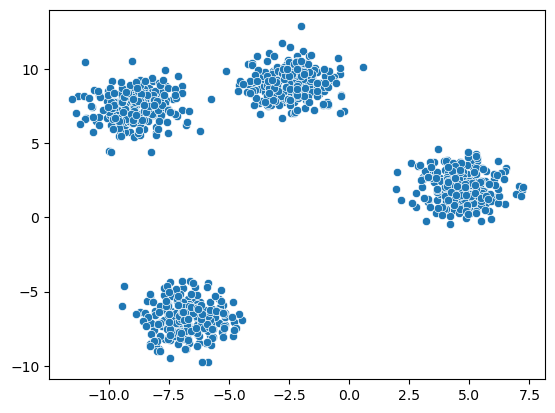

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [5]:
# K-Means Clustering
from sklearn.cluster import KMeans

In [6]:
k=4

kmeans = KMeans(
    n_clusters=k,
    random_state=42
)

In [7]:
lebels = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<Axes: >

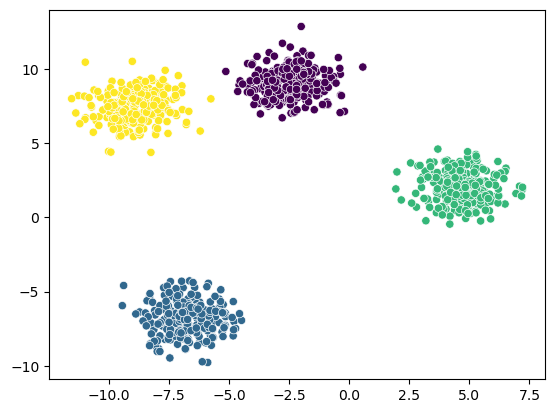

In [8]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=lebels)

# How to choose are K values

In [9]:
# Elbow Method
wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,  n_init=10)
    kmeans.fit_predict(X)
    #print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)


wcss
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

[66908.28490516872,
 31568.656867381345,
 7324.560564741559,
 1948.7329193856833,
 1771.3440384944768,
 1596.3505915624805,
 1444.1136456631655,
 1262.7430115229088,
 1161.157759595149,
 1053.3934799717044,
 956.5638896961868,
 869.5987168480915,
 816.4111990016694,
 771.3274683643292,
 722.2626866501828,
 698.8282165004101,
 644.4729806860586,
 620.7872411747228,
 598.0331356292381,
 559.5932278507685]

<Axes: >

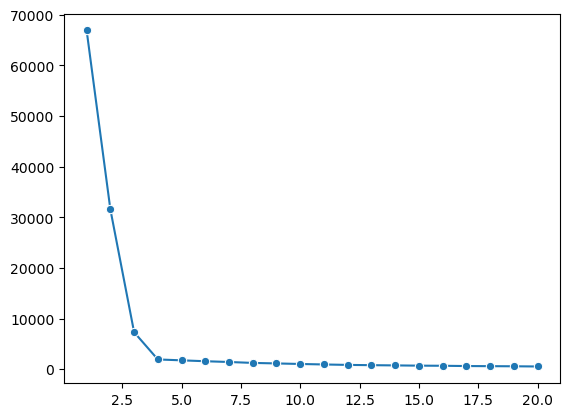

In [10]:
sns.lineplot(x=range(1,21), y=wcss, marker='o' )

In [11]:
# Kneed Module



ModuleNotFoundError: No module named 'kneed'

In [13]:
import sys
!{sys.executable} -m pip install --user kneed



In [14]:
from kneed import KneeLocator

In [15]:
knee = KneeLocator(range(1,21), wcss, curve="convex", direction="decreasing")

In [16]:
print("Optimal k = ", knee.elbow)

Optimal k =  4


# Silhouette Score

In [20]:
from sklearn.metrics import silhouette_score

ss=[]

for k in range(2,21):
    kmeans = KMeans(n_clusters=k)
    lebels = kmeans.fit_predict(X)
    score = silhouette_score(X, lebels)

    ss.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

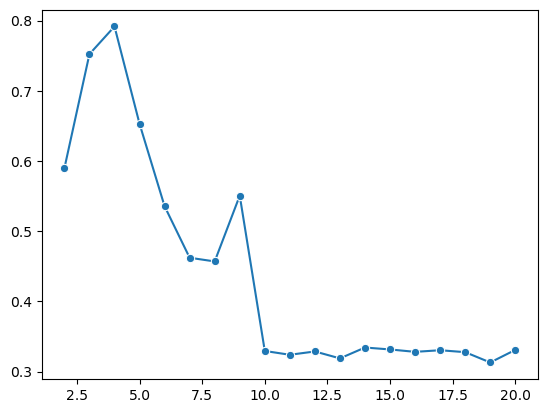

In [21]:
# plot -k vs ss

sns.lineplot(x=range(2,21), y=ss , marker='o')